In [1]:
from lale.grammar import Grammar, explore
from lale.helpers import to_graphviz

# Simple: First example

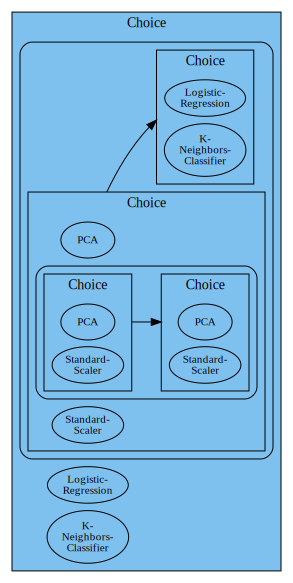

In [2]:
from lale.lib.sklearn import LogisticRegression, KNeighborsClassifier, PCA, StandardScaler

g = Grammar()

g.start       = g.estimator
g.estimator   = g.prim_est | g.transformer >> g.prim_est
g.transformer = g.prim_tfm | g.prim_tfm >> g.transformer

g.prim_tfm    = PCA | StandardScaler
g.prim_est = LogisticRegression | KNeighborsClassifier

generated = explore(g, 4)
to_graphviz(generated)

## Training

100%|██████████| 3/3 [00:01<00:00,  2.12it/s, best loss: -0.9014363327674024]


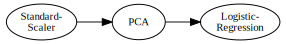

In [3]:
from lale.lib.lale import HyperoptCV
from lale.helpers import best_estimator
import lale.datasets
(train_X, train_y), (test_X, test_y) = lale.datasets.load_iris_df()

trainer = HyperoptCV(estimator=generated, cv=2, max_evals=3, scoring='r2')
trained = trainer.fit(train_X, train_y)
to_graphviz(best_estimator(trained))

# Grammar that exercices all combinators

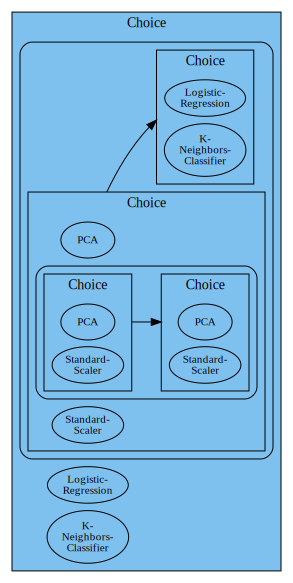

In [4]:
from lale.lib.sklearn import LogisticRegression, KNeighborsClassifier, PCA, StandardScaler
from lale.lib.autogen import AdaBoostClassifier
from lale.lib.lale import ConcatFeatures

g = Grammar()

g.start       = g.estimator
g.estimator   = g.term_est | g.transformer >> g.term_est
g.term_est    = g.prim_est # | g.ensemble      # Todo add higher-order operators
# g.ensemble    = g.ensembler ( g.estimator )
g.transformer = g.union_tfm | g.union_tfm >> g.transformer
g.union_tfm   = g.prim_tfm | g.union_body >> ConcatFeatures
g.union_body  = g.transformer | g.transformer & g.union_body

g.prim_tfm    = PCA | StandardScaler
g.prim_est    = LogisticRegression | KNeighborsClassifier
g.ensembler   = AdaBoostClassifier

generated = explore(g, 5)
to_graphviz(generated)

100%|██████████| 3/3 [00:02<00:00,  1.63it/s, best loss: -0.8892363327674024]


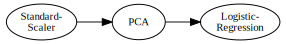

In [5]:
trainer = HyperoptCV(estimator=generated, cv=2, max_evals=3, scoring='r2')
trained = trainer.fit(train_X, train_y)
to_graphviz(best_estimator(trained))

# recipe: grammar from this [paper](https://link.springer.com/chapter/10.1007/978-3-319-55696-3_16)

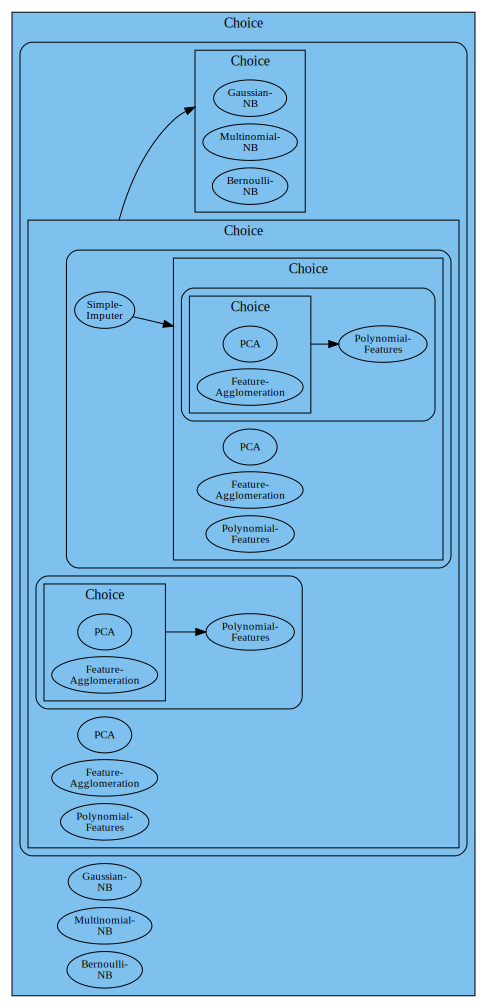

In [6]:
from lale.lib.sklearn import SimpleImputer, PCA, FeatureAgglomeration, PolynomialFeatures, RandomForestClassifier, DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from lale.lib.autogen import  GaussianNB, MultinomialNB, BernoulliNB
import lale.helpers

lale.helpers.wrap_imported_operators()


g = Grammar()

g.start = g.algorithm | g.preprocessing >> g.algorithm
g.preprocessing = g.imputation >> g.dimensionality_definition | g.dimensionality_definition
g.dimensionality_definition = g.feature_selection >> g.feature_construction | g.feature_selection | g.feature_construction
g.feature_selection = g.unsupervised # | g.supervised 
g.algorithm = g.naive_bayes | g.trees

g.imputation = SimpleImputer
# g.supervised = SelectKBest
g.unsupervised = PCA | FeatureAgglomeration
g.feature_construction = PolynomialFeatures
g.naive_bayes = GaussianNB | MultinomialNB | BernoulliNB
g.trees = g.DecisionTree | g.RandomForest


generated = explore(g, 4)
to_graphviz(generated)

100%|██████████| 3/3 [00:01<00:00,  1.47it/s, best loss: -0.9380363327674024]


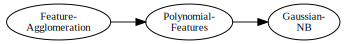

In [7]:
trainer = HyperoptCV(estimator=generated, cv=2, max_evals=3, scoring='r2')
trained = trainer.fit(train_X, train_y)
to_graphviz(best_estimator(trained))

# alphad3m: Grammar from this [paper](https://www.automl.org/wp-content/uploads/2019/06/automlws2019_Paper34.pdf)

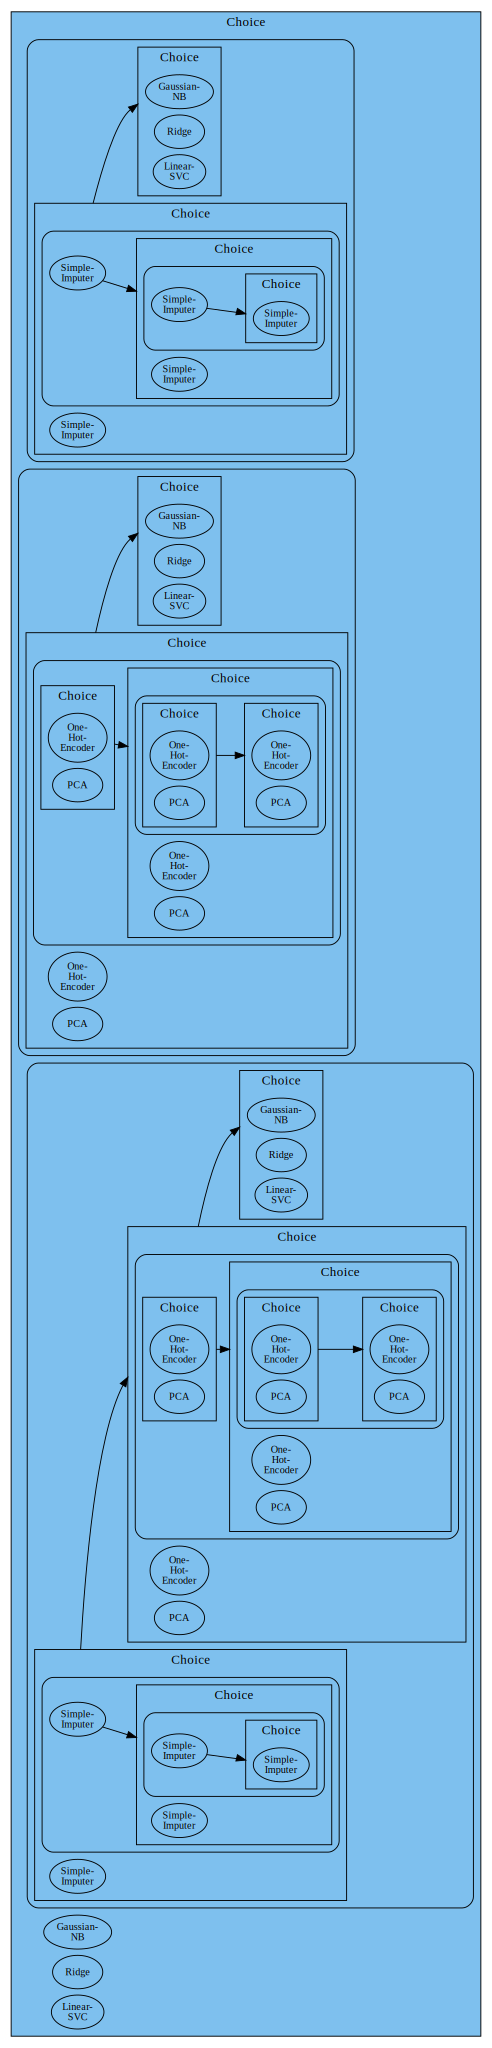

In [8]:
from lale.lib.sklearn import OneHotEncoder, SimpleImputer, Ridge, LinearSVC, PCA, GaussianNB
from lale.lib.autogen import OrdinalEncoder, SGDClassifier

g = Grammar()

g.start  = g.est | g.clean >> g.est | g.tfm >> g.est | g.clean >> g.tfm >> g.est
g.clean  = g.clean1 >> g.clean | g.clean1
g.tfm    = g.tfm1 >> g.tfm | g.tfm1

g.clean1 = SimpleImputer #SkImputer | MissingIndicator
g.tfm1   = OneHotEncoder  | PCA # | OrdinalEncoder
g.est    = GaussianNB | Ridge  | LinearSVC # | SGDClassifier

generated = explore(g, 4)
to_graphviz(generated)

100%|██████████| 3/3 [00:02<00:00,  1.11it/s, best loss: -0.9139575551782683]


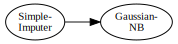

In [9]:
trainer = HyperoptCV(estimator=generated, cv=2, max_evals=3, scoring='r2')
trained = trainer.fit(train_X, train_y)
to_graphviz(best_estimator(trained))